### Package import

In [1]:
import os 
import cv2
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import ticker
import seaborn as sns
# import plotly.plotly as py

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import metrics
from sklearn import neural_network
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

import keras
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop, adam
from keras.utils import np_utils

/Users/leejoonsung/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Question1

### Data Pre-processing

In [81]:
data_sampling_rate = 0.5

Setup the number of folds for all grid searches

In [82]:
cv_folds = 5

In [83]:
dataset = pd.read_csv("state_vectors_2018-04-09-18-25-26.csv", encoding = "ISO-8859-1")
dataset = dataset.sample(frac=data_sampling_rate)

In [84]:
dataset.head()

,step,pos_x,pos_y,vel_x,vel_y,ship_lander_angle,ship_lander_angular_vel,leg_1_ground_contact,leg_2_ground_contact,action
91909,100,0.301275,0.289254,-0.262984,-0.217840,0.214712,-0.138139,0.0,0.0,0
183534,101,-0.119526,0.212999,0.236280,-0.282612,-0.086865,0.095317,0.0,0.0,2
236887,93,-0.016992,0.254888,0.034831,-0.352161,-0.014658,0.022459,0.0,0.0,2
96540,178,0.029200,0.040598,-0.026431,-0.132349,0.152700,-0.067712,0.0,0.0,2
103870,91,-0.316885,0.293784,0.160349,-0.203210,-0.265415,0.101244,0.0,0.0,0


In [85]:
X = dataset[dataset.columns[1:9]]
Y = np.array(dataset["action"])

Normalise the data

In [86]:
X = X/255

In [87]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [88]:
len(X_test)

37727

In [89]:
len(y_test)

37727

In [90]:
X_train_plus_valid.head()

,pos_x,pos_y,vel_x,vel_y,ship_lander_angle,ship_lander_angular_vel,leg_1_ground_contact,leg_2_ground_contact
223515,0.000106,0.003625,4.711860e-04,-1.291953e-03,0.000133,1.382630e-04,0.000000,0.000000
72164,-0.000756,0.000276,9.414841e-04,-1.775322e-04,0.000672,1.499266e-04,0.000000,0.000000
193363,0.000068,0.000221,3.357693e-04,-6.056298e-04,0.000475,2.541082e-05,0.000000,0.000000
10987,-0.000061,0.000293,1.294753e-04,-7.730860e-04,0.000614,-1.498529e-04,0.000000,0.000000
183186,0.000110,-0.000003,-5.025982e-07,-4.515411e-10,-0.000005,1.446544e-07,0.003922,0.003922


### Model Buiding

Random Forests

In [91]:
# Set up the parameter grid to seaerch
param_grid = [
 {'n_estimators': list(range(100, 300, 50)), 'max_features': list(range(2, 10, 2)), 'min_samples_split': list(range(50,200,50)) }
]

# Perform the search
my_tuned_model = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model.fit(X_train_plus_valid, y_train_plus_valid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_features=2, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=2, min_samples_split=50, n_estimators=100, total=  11.9s
[CV] max_features=2, min_samples_split=50, n_estimators=100 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV]  max_features=2, min_samples_split=50, n_estimators=100, total=  11.7s
[CV] max_features=2, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=2, min_samples_split=50, n_estimators=100, total=  11.8s
[CV] max_features=2, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=2, min_samples_split=50, n_estimators=100, total=  12.0s
[CV] max_features=2, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=2, min_samples_split=50, n_estimators=100, total=  11.7s
[CV] max_features=2, min_samples_split=50, n_estimators=150 ..........
[CV]  max_features=2, min_samples_split=50, n_estimators=150, total=  18.0s
[CV] max_features=2, min_samples_split=50, n_estimators=150 ..........
[CV]  max_features=2, min_samples_split=50, n_estimators=150, total=  17.7s
[CV] max_features=2, min_samples_split=50, n_estimators=150 ..........
[CV]  max_features=2, min_samples_split=50, n_estimators=150, total=  18.5s
[CV] max_features=2, min_samples_split=50,

[CV]  max_features=2, min_samples_split=150, n_estimators=250, total=  30.2s
[CV] max_features=2, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=2, min_samples_split=150, n_estimators=250, total=  30.0s
[CV] max_features=2, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=2, min_samples_split=150, n_estimators=250, total=  29.7s
[CV] max_features=4, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=4, min_samples_split=50, n_estimators=100, total=  21.5s
[CV] max_features=4, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=4, min_samples_split=50, n_estimators=100, total=  21.4s
[CV] max_features=4, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=4, min_samples_split=50, n_estimators=100, total=  21.3s
[CV] max_features=4, min_samples_split=50, n_estimators=100 ..........
[CV]  max_features=4, min_samples_split=50, n_estimators=100, total=  21.1s
[CV] max_features=4, min_samples_split=

[CV]  max_features=4, min_samples_split=150, n_estimators=200, total=  35.2s
[CV] max_features=4, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=4, min_samples_split=150, n_estimators=200, total=  35.1s
[CV] max_features=4, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=4, min_samples_split=150, n_estimators=250, total=  43.3s
[CV] max_features=4, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=4, min_samples_split=150, n_estimators=250, total=  43.6s
[CV] max_features=4, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=4, min_samples_split=150, n_estimators=250, total=  43.8s
[CV] max_features=4, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=4, min_samples_split=150, n_estimators=250, total=  43.9s
[CV] max_features=4, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=4, min_samples_split=150, n_estimators=250, total=  43.5s
[CV] max_features=6, min_samples_sp

[CV]  max_features=6, min_samples_split=150, n_estimators=150, total=  37.3s
[CV] max_features=6, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=6, min_samples_split=150, n_estimators=200, total=  49.1s
[CV] max_features=6, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=6, min_samples_split=150, n_estimators=200, total=  49.6s
[CV] max_features=6, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=6, min_samples_split=150, n_estimators=200, total=  49.4s
[CV] max_features=6, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=6, min_samples_split=150, n_estimators=200, total=  49.6s
[CV] max_features=6, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=6, min_samples_split=150, n_estimators=200, total=  49.3s
[CV] max_features=6, min_samples_split=150, n_estimators=250 .........
[CV]  max_features=6, min_samples_split=150, n_estimators=250, total= 1.0min
[CV] max_features=6, min_samples_sp

[CV]  max_features=8, min_samples_split=150, n_estimators=150, total=  47.5s
[CV] max_features=8, min_samples_split=150, n_estimators=150 .........
[CV]  max_features=8, min_samples_split=150, n_estimators=150, total=  47.6s
[CV] max_features=8, min_samples_split=150, n_estimators=150 .........
[CV]  max_features=8, min_samples_split=150, n_estimators=150, total=  48.2s
[CV] max_features=8, min_samples_split=150, n_estimators=150 .........
[CV]  max_features=8, min_samples_split=150, n_estimators=150, total=  47.5s
[CV] max_features=8, min_samples_split=150, n_estimators=150 .........
[CV]  max_features=8, min_samples_split=150, n_estimators=150, total=  47.8s
[CV] max_features=8, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=8, min_samples_split=150, n_estimators=200, total= 1.1min
[CV] max_features=8, min_samples_split=150, n_estimators=200 .........
[CV]  max_features=8, min_samples_split=150, n_estimators=200, total= 1.1min
[CV] max_features=8, min_samples_sp

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 165.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 150, 200, 250], 'max_features': [2, 4, 6, 8], 'min_samples_split': [50, 100, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [92]:
# Make a set of predictions for the tet data
y_pred = my_tuned_model.predict(X_test)

In [93]:
# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None

In [94]:
accuracy

0.8991968616640602

### Persist A Model

In [115]:
from sklearn.externals import joblib

In [116]:
joblib.dump(my_tuned_model, 'player_state.pkl')

['player_state.pkl']

In [97]:
clf = joblib.load('player_state.pkl') 

In [98]:
clf.predict(X_test)

array([2, 2, 0, ..., 2, 0, 2])

Neural Network

In [99]:
# Set up the parameter grid to seaerch
param_grid1 = [
               {'hidden_layer_sizes': [(400), (400, 200), (400, 200, 100)], 
               'alpha': list(10.0 ** -np.arange(1, 7))}
]

# Perform the search
my_tuned_model1 = GridSearchCV(neural_network.MLPClassifier(), param_grid1, cv=cv_folds, verbose = 2)
my_tuned_model1.fit(X_train_plus_valid, y_train_plus_valid)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] alpha=0.1, hidden_layer_sizes=400 ...............................
[CV] ................ alpha=0.1, hidden_layer_sizes=400, total=  16.6s
[CV] alpha=0.1, hidden_layer_sizes=400 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s remaining:    0.0s


[CV] ................ alpha=0.1, hidden_layer_sizes=400, total=   2.6s
[CV] alpha=0.1, hidden_layer_sizes=400 ...............................
[CV] ................ alpha=0.1, hidden_layer_sizes=400, total=   4.6s
[CV] alpha=0.1, hidden_layer_sizes=400 ...............................
[CV] ................ alpha=0.1, hidden_layer_sizes=400, total=  14.5s
[CV] alpha=0.1, hidden_layer_sizes=400 ...............................
[CV] ................ alpha=0.1, hidden_layer_sizes=400, total=   3.1s
[CV] alpha=0.1, hidden_layer_sizes=(400, 200) ........................
[CV] ......... alpha=0.1, hidden_layer_sizes=(400, 200), total=  22.1s
[CV] alpha=0.1, hidden_layer_sizes=(400, 200) ........................
[CV] ......... alpha=0.1, hidden_layer_sizes=(400, 200), total=  22.1s
[CV] alpha=0.1, hidden_layer_sizes=(400, 200) ........................
[CV] ......... alpha=0.1, hidden_layer_sizes=(400, 200), total=  27.4s
[CV] alpha=0.1, hidden_layer_sizes=(400, 200) ........................
[CV] .

/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ............. alpha=0.0001, hidden_layer_sizes=400, total= 5.2min
[CV] alpha=0.0001, hidden_layer_sizes=400 ............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ............. alpha=0.0001, hidden_layer_sizes=400, total= 5.3min
[CV] alpha=0.0001, hidden_layer_sizes=400 ............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ............. alpha=0.0001, hidden_layer_sizes=400, total= 5.3min
[CV] alpha=0.0001, hidden_layer_sizes=(400, 200) .....................
[CV] ...... alpha=0.0001, hidden_layer_sizes=(400, 200), total=22.5min
[CV] alpha=0.0001, hidden_layer_sizes=(400, 200) .....................
[CV] ...... alpha=0.0001, hidden_layer_sizes=(400, 200), total=49.2min
[CV] alpha=0.0001, hidden_layer_sizes=(400, 200) .....................
[CV] ...... alpha=0.0001, hidden_layer_sizes=(400, 200), total=27.8min
[CV] alpha=0.0001, hidden_layer_sizes=(400, 200) .....................
[CV] ...... alpha=0.0001, hidden_layer_sizes=(400, 200), total=30.2min
[CV] alpha=0.0001, hidden_layer_sizes=(400, 200) .....................
[CV] ...... alpha=0.0001, hidden_layer_sizes=(400, 200), total= 4.2min
[CV] alpha=0.0001, hidden_layer_sizes=(400, 200, 100) ................
[CV] . alpha=0.0001, hidden_layer_sizes=(400, 200, 100), total=13.9min
[CV] alpha=0.0001, hidden_layer_sizes=(400, 200, 100) ................
[CV] .

/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-05, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-05, hidden_layer_sizes=400 .............................
[CV] .............. alpha=1e-05, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-05, hidden_layer_sizes=400 .............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-05, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-05, hidden_layer_sizes=400 .............................
[CV] .............. alpha=1e-05, hidden_layer_sizes=400, total= 1.3min
[CV] alpha=1e-05, hidden_layer_sizes=400 .............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-05, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-05, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(400, 200), total= 2.7min
[CV] alpha=1e-05, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(400, 200), total= 2.9min
[CV] alpha=1e-05, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(400, 200), total= 2.7min
[CV] alpha=1e-05, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(400, 200), total= 2.4min
[CV] alpha=1e-05, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-05, hidden_layer_sizes=(400, 200), total= 2.5min
[CV] alpha=1e-05, hidden_layer_sizes=(400, 200, 100) .................
[CV] .. alpha=1e-05, hidden_layer_sizes=(400, 200, 100), total= 2.1min
[CV] alpha=1e-05, hidden_layer_sizes=(400, 200, 100) .................
[CV] .

/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-06, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-06, hidden_layer_sizes=400 .............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-06, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-06, hidden_layer_sizes=400 .............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-06, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-06, hidden_layer_sizes=400 .............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-06, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-06, hidden_layer_sizes=400 .............................


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .............. alpha=1e-06, hidden_layer_sizes=400, total= 1.7min
[CV] alpha=1e-06, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-06, hidden_layer_sizes=(400, 200), total= 3.9min
[CV] alpha=1e-06, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-06, hidden_layer_sizes=(400, 200), total= 3.5min
[CV] alpha=1e-06, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-06, hidden_layer_sizes=(400, 200), total= 3.7min
[CV] alpha=1e-06, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-06, hidden_layer_sizes=(400, 200), total= 2.7min
[CV] alpha=1e-06, hidden_layer_sizes=(400, 200) ......................
[CV] ....... alpha=1e-06, hidden_layer_sizes=(400, 200), total= 3.0min
[CV] alpha=1e-06, hidden_layer_sizes=(400, 200, 100) .................
[CV] .. alpha=1e-06, hidden_layer_sizes=(400, 200, 100), total= 2.1min
[CV] alpha=1e-06, hidden_layer_sizes=(400, 200, 100) .................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 502.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [400, (400, 200), (400, 200, 100)], 'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [100]:
# Make a set of predictions for the tet data
y_pred1 = my_tuned_model1.predict(X_test)

In [101]:
# Print performance details
accuracy1 = metrics.accuracy_score(y_test, y_pred1) # , normalize=True, sample_weight=None

In [102]:
accuracy1

0.8984546876242478

KNN

In [103]:
# Set up the parameter grid to seaerch
param_grid2 = [
               {'n_neighbors': list(range(1, 50, 5))}
]

# Perform the search
my_tuned_model2 = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid2, cv=cv_folds, verbose = 2)
my_tuned_model2.fit(X_train_plus_valid, y_train_plus_valid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.6s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   0.6s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.5s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.4s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.5s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.9s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.9s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.9s
[CV] n_neighbors=6 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [104]:
# Make a set of predictions for the tet data
y_pred2 = my_tuned_model2.predict(X_test)

In [105]:
# Print performance details
accuracy2 = metrics.accuracy_score(y_test, y_pred2) # , normalize=True, sample_weight=None

In [106]:
accuracy2

0.8356614626129828

# Question2

### Package import

In [32]:
# Set up some parmaeters for data loading
TRAIN_DIR = './data/'
sample_rate = 0.5
ROWS = 64
COLS = 64
CHANNELS = 1

# generate filenames from the data folder and do sampling
image_filenames = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if not i.startswith('.')] # use this for full dataset
image_filenames = random.sample(image_filenames, int(len(image_filenames)*sample_rate))

# Create a data array for image data
count = len(image_filenames)
data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.float)

# Iterate throuigh the filenames and for each one load the image, resize and normalise
for i, image_file in enumerate(image_filenames):
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)        
    data[i] = image
    data[i] = data[i]/255
    if i%1000 == 0: print('Processed {} of {}'.format(i, count))

print("Train shape: {}".format(data.shape))

Processed 0 of 32162
Processed 1000 of 32162
Processed 2000 of 32162
Processed 3000 of 32162
Processed 4000 of 32162
Processed 5000 of 32162
Processed 6000 of 32162
Processed 7000 of 32162
Processed 8000 of 32162
Processed 9000 of 32162
Processed 10000 of 32162
Processed 11000 of 32162
Processed 12000 of 32162
Processed 13000 of 32162
Processed 14000 of 32162
Processed 15000 of 32162
Processed 16000 of 32162
Processed 17000 of 32162
Processed 18000 of 32162
Processed 19000 of 32162
Processed 20000 of 32162
Processed 21000 of 32162
Processed 22000 of 32162
Processed 23000 of 32162
Processed 24000 of 32162
Processed 25000 of 32162
Processed 26000 of 32162
Processed 27000 of 32162
Processed 28000 of 32162
Processed 29000 of 32162
Processed 30000 of 32162
Processed 31000 of 32162
Processed 32000 of 32162
Train shape: (32162, 1, 64, 64)


### Generating the labels

In [33]:
# Extract the lables from the last characters in the filename
labels = []
for i in image_filenames:
    l = i[-6:-5]
    labels.append(int(l))
        
# Count the number of clases
num_classes = len(set(labels))

# convert to binary encoded labels
labels_wide = keras.utils.to_categorical(labels, num_classes)

### Partition the dataset for evaluation

In [34]:
train, test, train_labels, test_labels = train_test_split(data, labels, random_state=0, test_size = 0.2, train_size = 0.8)
train_labels_wide = keras.utils.to_categorical(train_labels, num_classes)
test_labels_wide = keras.utils.to_categorical(test_labels, num_classes)

In [35]:
# Apply the random under-sampling (balance the traning dataset)
rus = RandomUnderSampler(return_indices=True)
train_rus, train_labels_rus, idx_resampled = rus.fit_sample(train.reshape(len(train), ROWS*COLS*CHANNELS), train_labels)
train_rus, train_labels_rus = shuffle(train_rus, train_labels_rus)
train_rus = train_rus.reshape(len(train_rus), CHANNELS,ROWS, COLS)
train_labels_rus_wide = keras.utils.to_categorical(train_labels_rus, num_classes)

In [36]:
from keras import backend as K
K.set_image_data_format('channels_first')

### Building a model

CNN model - 2 layers

In [37]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', input_shape=(CHANNELS, ROWS, COLS), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(48, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(num_classes, activation = 'softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 64, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 32, 32)        13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [38]:
model1.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

### Train

In [39]:
epochs = 30
batch_size = 128
history = model1.fit(train_rus, train_labels_rus_wide, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=1, shuffle=True)

Train on 8289 samples, validate on 2763 samples
Epoch 1/30
8289/8289 [==============================] - 100s 12ms/step - loss: 1.2737 - acc: 0.3826 - val_loss: 1.1226 - val_acc: 0.4730
Epoch 2/30
8289/8289 [==============================] - 99s 12ms/step - loss: 1.0940 - acc: 0.4843 - val_loss: 1.0372 - val_acc: 0.5074
Epoch 3/30
8289/8289 [==============================] - 98s 12ms/step - loss: 1.0332 - acc: 0.5204 - val_loss: 0.9938 - val_acc: 0.5349
Epoch 4/30
8289/8289 [==============================] - 98s 12ms/step - loss: 0.9990 - acc: 0.5246 - val_loss: 0.9794 - val_acc: 0.5349
Epoch 5/30
8289/8289 [==============================] - 111s 13ms/step - loss: 0.9705 - acc: 0.5412 - val_loss: 0.9725 - val_acc: 0.5360
Epoch 6/30
8289/8289 [==============================] - 115s 14ms/step - loss: 0.9526 - acc: 0.5530 - val_loss: 0.9594 - val_acc: 0.5519
Epoch 7/30
8289/8289 [==============================] - 112s 14ms/step - loss: 0.9283 - acc: 0.5685 - val_loss: 0.9507 - val_acc: 0.5

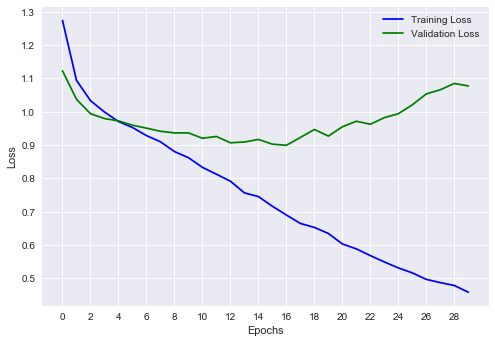

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Evaluation

In [41]:
print("****** Test Data ********")
# Make a set of predictions for the validation data
pred1 = model1.predict_classes(test)

# Print performance details
print(metrics.classification_report(test_labels, pred1))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(test_labels, pred1))
#display(pd.crosstab(test_labels, list(pred), margins=True))

****** Test Data ********
             precision    recall  f1-score   support

          0       0.49      0.47      0.48      2416
          1       0.52      0.73      0.61       674
          2       0.53      0.43      0.48      2654
          3       0.48      0.72      0.57       689

avg / total       0.51      0.51      0.50      6433

Confusion Matrix
[[1137  190  831  258]
 [  91  492   84    7]
 [ 987  252 1143  272]
 [  95   12   88  494]]


In [42]:
print(metrics.accuracy_score(test_labels, pred1))

0.5076946992072128


### CNN model - 3 layers

In [43]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(CHANNELS, ROWS, COLS), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(48, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes, activation = 'softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 64, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 32, 32)        13872     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 16, 16)        27712     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 8, 8)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [44]:
model2.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

### Train

In [45]:
epochs = 30
batch_size = 128

history = model2.fit(train_rus, train_labels_rus_wide, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=1, shuffle=True)

Train on 8289 samples, validate on 2763 samples
Epoch 1/30
8289/8289 [==============================] - 112s 14ms/step - loss: 1.2593 - acc: 0.3840 - val_loss: 1.1258 - val_acc: 0.4767
Epoch 2/30
8289/8289 [==============================] - 111s 13ms/step - loss: 1.1046 - acc: 0.4770 - val_loss: 1.0532 - val_acc: 0.4962
Epoch 3/30
8289/8289 [==============================] - 111s 13ms/step - loss: 1.0577 - acc: 0.5034 - val_loss: 1.0234 - val_acc: 0.5089
Epoch 4/30
8289/8289 [==============================] - 111s 13ms/step - loss: 1.0295 - acc: 0.5171 - val_loss: 1.0031 - val_acc: 0.5208
Epoch 5/30
8289/8289 [==============================] - 111s 13ms/step - loss: 1.0007 - acc: 0.5294 - val_loss: 0.9935 - val_acc: 0.5168
Epoch 6/30
8289/8289 [==============================] - 111s 13ms/step - loss: 0.9874 - acc: 0.5354 - val_loss: 0.9739 - val_acc: 0.5335
Epoch 7/30
8289/8289 [==============================] - 110s 13ms/step - loss: 0.9549 - acc: 0.5437 - val_loss: 0.9565 - val_acc: 

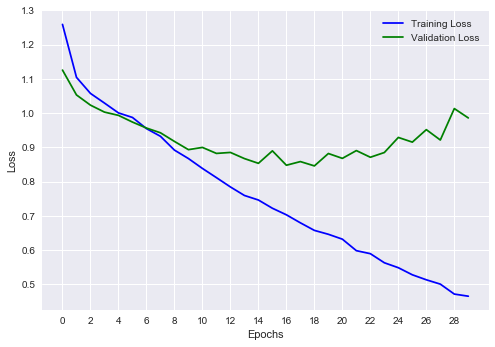

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Evaluation

In [47]:
print("****** Test Data ********")
# Make a set of predictions for the validation data
pred2 = model2.predict_classes(test)

# Print performance details
print(metrics.classification_report(test_labels, pred2))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(test_labels, pred2))
#display(pd.crosstab(test_labels, list(pred), margins=True))

****** Test Data ********
             precision    recall  f1-score   support

          0       0.54      0.50      0.52      2416
          1       0.39      0.83      0.53       674
          2       0.66      0.38      0.49      2654
          3       0.43      0.78      0.56       689

avg / total       0.56      0.51      0.51      6433

Confusion Matrix
[[1198  440  439  339]
 [  75  557   35    7]
 [ 869  414 1019  352]
 [  89   23   40  537]]


In [48]:
print(metrics.accuracy_score(test_labels, pred2))

0.514689880304679


### CNN model - 4 layers

In [49]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), padding='same', input_shape=(CHANNELS, ROWS, COLS), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(48, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(80, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(num_classes, activation = 'softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 64, 64)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 32, 32)        13872     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 16, 16)        27712     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 8, 8)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 80, 8, 8)          46160     
__________

In [50]:
model3.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

### Train

In [51]:
epochs = 30
batch_size = 128

history = model3.fit(train_rus, train_labels_rus_wide, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=1, shuffle=True)

Train on 8289 samples, validate on 2763 samples
Epoch 1/30
8289/8289 [==============================] - 117s 14ms/step - loss: 1.2948 - acc: 0.3501 - val_loss: 1.1590 - val_acc: 0.4263
Epoch 2/30
8289/8289 [==============================] - 117s 14ms/step - loss: 1.1241 - acc: 0.4645 - val_loss: 1.0697 - val_acc: 0.4955
Epoch 3/30
8289/8289 [==============================] - 116s 14ms/step - loss: 1.0584 - acc: 0.4973 - val_loss: 1.0227 - val_acc: 0.5031
Epoch 4/30
8289/8289 [==============================] - 123s 15ms/step - loss: 1.0266 - acc: 0.5121 - val_loss: 1.0124 - val_acc: 0.5118
Epoch 5/30
8289/8289 [==============================] - 117s 14ms/step - loss: 1.0142 - acc: 0.5186 - val_loss: 1.0019 - val_acc: 0.5027
Epoch 6/30
8289/8289 [==============================] - 117s 14ms/step - loss: 0.9853 - acc: 0.5236 - val_loss: 0.9782 - val_acc: 0.5150
Epoch 7/30
8289/8289 [==============================] - 117s 14ms/step - loss: 0.9525 - acc: 0.5458 - val_loss: 0.9334 - val_acc: 

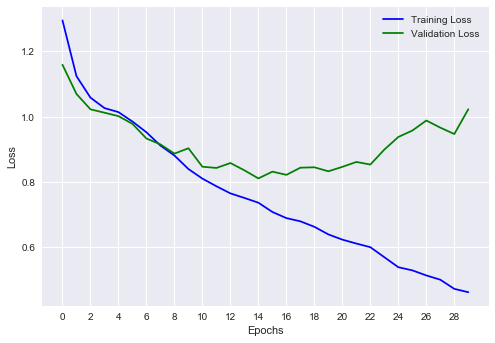

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Evulation

In [53]:
print("****** Test Data ********")
# Make a set of predictions for the validation data
pred3 = model3.predict_classes(test)

# Print performance details
print(metrics.classification_report(test_labels, pred3))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(test_labels, pred3))
#display(pd.crosstab(test_labels, list(pred), margins=True))

****** Test Data ********
             precision    recall  f1-score   support

          0       0.50      0.48      0.49      2416
          1       0.54      0.77      0.63       674
          2       0.56      0.48      0.52      2654
          3       0.57      0.72      0.64       689

avg / total       0.54      0.54      0.53      6433

Confusion Matrix
[[1167  217  851  181]
 [  88  516   59   11]
 [ 983  216 1268  187]
 [ 113   10   69  497]]


In [54]:
print(metrics.accuracy_score(test_labels, pred3))

0.5359863205347427


### CNN model - 5 layers

In [55]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), padding='same', input_shape=(CHANNELS, ROWS, COLS), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(48, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(80, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(num_classes, activation = 'softmax'))

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 64, 64)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 32, 32)        13872     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 16, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 16, 16)        27712     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 8, 8)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 80, 8, 8)          46160     
__________

In [56]:
model4.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

### Train

In [57]:
epochs = 30
batch_size = 128

history = model4.fit(train_rus, train_labels_rus_wide, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=1, shuffle=True)

Train on 8289 samples, validate on 2763 samples
Epoch 1/30
8289/8289 [==============================] - 118s 14ms/step - loss: 1.2996 - acc: 0.3418 - val_loss: 1.1581 - val_acc: 0.4307
Epoch 2/30
8289/8289 [==============================] - 117s 14ms/step - loss: 1.1205 - acc: 0.4654 - val_loss: 1.0657 - val_acc: 0.4897
Epoch 3/30
8289/8289 [==============================] - 117s 14ms/step - loss: 1.0611 - acc: 0.4972 - val_loss: 1.0242 - val_acc: 0.5049
Epoch 4/30
8289/8289 [==============================] - 117s 14ms/step - loss: 1.0240 - acc: 0.5153 - val_loss: 1.0066 - val_acc: 0.5208
Epoch 5/30
8289/8289 [==============================] - 117s 14ms/step - loss: 1.0037 - acc: 0.5213 - val_loss: 0.9861 - val_acc: 0.5212
Epoch 6/30
8289/8289 [==============================] - 117s 14ms/step - loss: 0.9805 - acc: 0.5328 - val_loss: 0.9665 - val_acc: 0.5378
Epoch 7/30
8289/8289 [==============================] - 117s 14ms/step - loss: 0.9430 - acc: 0.5460 - val_loss: 0.9554 - val_acc: 

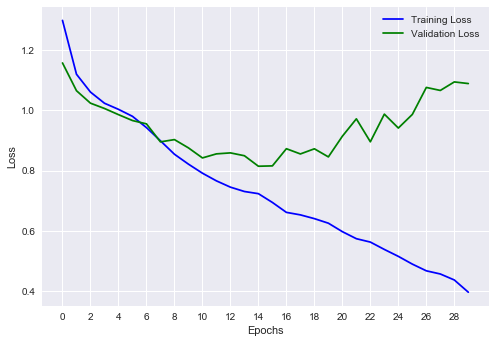

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Evaluation

In [59]:
print("****** Test Data ********")
# Make a set of predictions for the validation data
pred4 = model4.predict_classes(test)

# Print performance details
print(metrics.classification_report(test_labels, pred4))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(test_labels, pred4))
#display(pd.crosstab(test_labels, list(pred), margins=True))

****** Test Data ********
             precision    recall  f1-score   support

          0       0.50      0.54      0.52      2416
          1       0.49      0.77      0.60       674
          2       0.61      0.38      0.47      2654
          3       0.49      0.76      0.59       689

avg / total       0.54      0.52      0.52      6433

Confusion Matrix
[[1315  273  561  267]
 [ 104  518   46    6]
 [1112  249 1020  273]
 [ 124    9   34  522]]


In [60]:
print(metrics.accuracy_score(test_labels, pred4))

0.5246385823099643


### CNN model - 6 layers

In [61]:
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), padding='same', input_shape=(CHANNELS, ROWS, COLS), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(48, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(80, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(108, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())

model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))

model5.add(Dense(num_classes, activation = 'softmax'))

model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 64, 64)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 32, 32)        13872     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 16, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 16, 16)        27712     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 8, 8)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 80, 8, 8)          46160     
__________

In [62]:
model5.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

In [63]:
len(train_rus)

11052

### Train

In [64]:
epochs = 30
batch_size = 128

history = model5.fit(train_rus, train_labels_rus_wide, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=1, shuffle=True)

Train on 8289 samples, validate on 2763 samples
Epoch 1/30
8289/8289 [==============================] - 121s 15ms/step - loss: 1.3202 - acc: 0.3300 - val_loss: 1.1589 - val_acc: 0.4390
Epoch 2/30
8289/8289 [==============================] - 116s 14ms/step - loss: 1.1356 - acc: 0.4652 - val_loss: 1.0708 - val_acc: 0.4911
Epoch 3/30
8289/8289 [==============================] - 116s 14ms/step - loss: 1.0540 - acc: 0.5052 - val_loss: 1.0164 - val_acc: 0.5045
Epoch 4/30
8289/8289 [==============================] - 116s 14ms/step - loss: 1.0220 - acc: 0.5161 - val_loss: 1.0069 - val_acc: 0.5157
Epoch 5/30
8289/8289 [==============================] - 116s 14ms/step - loss: 0.9975 - acc: 0.5244 - val_loss: 0.9748 - val_acc: 0.5237
Epoch 6/30
8289/8289 [==============================] - 116s 14ms/step - loss: 0.9654 - acc: 0.5437 - val_loss: 0.9485 - val_acc: 0.5371
Epoch 7/30
8289/8289 [==============================] - 116s 14ms/step - loss: 0.9227 - acc: 0.5530 - val_loss: 0.9238 - val_acc: 

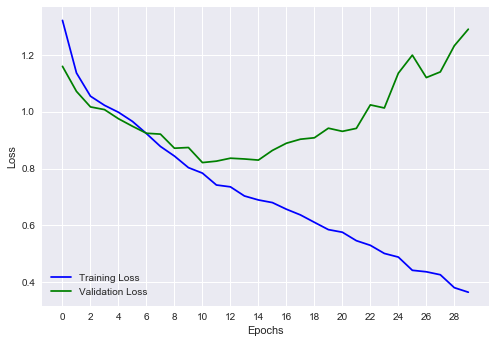

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Evaluation

In [66]:
print("****** Test Data ********")
# Make a set of predictions for the validation data
pred5 = model5.predict_classes(test)

# Print performance details
print(metrics.classification_report(test_labels, pred5))

# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(test_labels, pred5))
#display(pd.crosstab(test_labels, list(pred), margins=True))

****** Test Data ********
             precision    recall  f1-score   support

          0       0.49      0.49      0.49      2416
          1       0.43      0.77      0.55       674
          2       0.59      0.37      0.45      2654
          3       0.45      0.76      0.57       689

avg / total       0.52      0.50      0.49      6433

Confusion Matrix
[[1191  329  580  316]
 [  94  516   58    6]
 [1037  326  977  314]
 [ 107   17   40  525]]


In [67]:
print(metrics.accuracy_score(test_labels, pred5))

0.49883413648375563


### Persist a model

Model 3 performs best

In [117]:
filepath = "player_images_2.mod"
model3.save(filepath)

## Question3

In [1]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory

import io
import sys
import csv

/Users/leejoonsung/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Get the environment and extract the number of actions.
ENV_NAME = 'LunarLander-v2'
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(75))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                450       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 75)                3825      
_________________________________________________________________
activation_2 (Activation)    (None, 75)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               7600      
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
__________

In [4]:
# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=500000, window_length=1)
policy = EpsGreedyQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy, enable_double_dqn=False)
dqn.compile(Adam(lr=0.002, decay=2.25e-05), metrics=['mae'])

In [5]:
# Train the model
dqn.fit(env, nb_steps=100000, visualize=False, verbose=2)

Training for 100000 steps ...


/Users/leejoonsung/anaconda/lib/python3.6/site-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    71/100000: episode: 1, duration: 1.289s, episode steps: 71, steps per second: 55, episode reward: -159.436, mean reward: -2.246 [-100.000, 13.179], mean action: 1.493 [0.000, 3.000], mean observation: 0.007 [-1.497, 5.697], loss: 2.913820, mean_absolute_error: 2.114091, mean_q: -0.438274
   168/100000: episode: 2, duration: 0.332s, episode steps: 97, steps per second: 293, episode reward: -369.158, mean reward: -3.806 [-100.000, 2.444], mean action: 2.031 [0.000, 3.000], mean observation: 0.244 [-1.755, 2.615], loss: 28.878475, mean_absolute_error: 3.345076, mean_q: -1.194434
   461/100000: episode: 3, duration: 1.119s, episode steps: 293, steps per second: 262, episode reward: -329.103, mean reward: -1.123 [-100.000, 45.166], mean action: 1.614 [0.000, 3.000], mean observation: 0.014 [-1.153, 2.335], loss: 26.448143, mean_absolute_error: 5.743047, mean_q: -3.752707
   595/100000: episode: 4, duration: 0.462s, episode steps: 134, steps per second: 290, episode reward: -456.621, mea

 12860/100000: episode: 29, duration: 0.674s, episode steps: 189, steps per second: 280, episode reward: -158.725, mean reward: -0.840 [-100.000, 4.257], mean action: 1.481 [0.000, 3.000], mean observation: -0.066 [-1.001, 0.942], loss: 6.219909, mean_absolute_error: 17.440815, mean_q: 14.171348
 13000/100000: episode: 30, duration: 0.491s, episode steps: 140, steps per second: 285, episode reward: -143.593, mean reward: -1.026 [-100.000, 17.340], mean action: 1.900 [0.000, 3.000], mean observation: 0.056 [-0.977, 2.956], loss: 5.849504, mean_absolute_error: 17.113703, mean_q: 15.039374
 13426/100000: episode: 31, duration: 1.702s, episode steps: 426, steps per second: 250, episode reward: -209.221, mean reward: -0.491 [-100.000, 9.315], mean action: 1.765 [0.000, 3.000], mean observation: 0.074 [-0.677, 1.182], loss: 4.505347, mean_absolute_error: 17.080147, mean_q: 14.835071
 14426/100000: episode: 32, duration: 4.688s, episode steps: 1000, steps per second: 213, episode reward: -109

 30095/100000: episode: 57, duration: 0.565s, episode steps: 170, steps per second: 301, episode reward: -210.745, mean reward: -1.240 [-100.000, 9.301], mean action: 1.541 [0.000, 3.000], mean observation: -0.017 [-1.310, 1.243], loss: 6.687345, mean_absolute_error: 28.588858, mean_q: 31.100519
 31095/100000: episode: 58, duration: 5.068s, episode steps: 1000, steps per second: 197, episode reward: -59.659, mean reward: -0.060 [-18.970, 20.372], mean action: 1.884 [0.000, 3.000], mean observation: 0.091 [-0.742, 1.000], loss: 7.401373, mean_absolute_error: 30.087063, mean_q: 33.383282
 31214/100000: episode: 59, duration: 0.439s, episode steps: 119, steps per second: 271, episode reward: -127.023, mean reward: -1.067 [-100.000, 10.465], mean action: 1.605 [0.000, 3.000], mean observation: -0.014 [-0.942, 1.666], loss: 7.463102, mean_absolute_error: 30.992332, mean_q: 35.685619
 31511/100000: episode: 60, duration: 1.090s, episode steps: 297, steps per second: 272, episode reward: -231

 46931/100000: episode: 85, duration: 2.669s, episode steps: 663, steps per second: 248, episode reward: -186.693, mean reward: -0.282 [-100.000, 14.827], mean action: 1.567 [0.000, 3.000], mean observation: -0.013 [-0.950, 1.000], loss: 8.901178, mean_absolute_error: 41.742264, mean_q: 52.442272
 47931/100000: episode: 86, duration: 4.411s, episode steps: 1000, steps per second: 227, episode reward: -91.041, mean reward: -0.091 [-23.994, 14.085], mean action: 1.723 [0.000, 3.000], mean observation: -0.013 [-0.733, 1.047], loss: 7.268562, mean_absolute_error: 42.707458, mean_q: 53.732731
 48931/100000: episode: 87, duration: 4.869s, episode steps: 1000, steps per second: 205, episode reward: -339.468, mean reward: -0.339 [-12.818, 23.687], mean action: 1.802 [0.000, 3.000], mean observation: -0.004 [-0.863, 1.329], loss: 9.650045, mean_absolute_error: 43.472580, mean_q: 55.074574
 49931/100000: episode: 88, duration: 4.202s, episode steps: 1000, steps per second: 238, episode reward: -

 67121/100000: episode: 113, duration: 1.815s, episode steps: 481, steps per second: 265, episode reward: 104.548, mean reward: 0.217 [-10.836, 100.000], mean action: 1.630 [0.000, 3.000], mean observation: 0.009 [-0.766, 1.000], loss: 7.074313, mean_absolute_error: 40.847324, mean_q: 52.365242
 67221/100000: episode: 114, duration: 0.375s, episode steps: 100, steps per second: 266, episode reward: -50.587, mean reward: -0.506 [-100.000, 15.386], mean action: 1.700 [0.000, 3.000], mean observation: -0.116 [-0.923, 1.000], loss: 6.216272, mean_absolute_error: 40.760307, mean_q: 52.165874
 67370/100000: episode: 115, duration: 0.541s, episode steps: 149, steps per second: 276, episode reward: -137.502, mean reward: -0.923 [-100.000, 11.496], mean action: 1.826 [0.000, 3.000], mean observation: -0.022 [-1.209, 1.000], loss: 3.885887, mean_absolute_error: 40.966251, mean_q: 53.235687
 67721/100000: episode: 116, duration: 1.358s, episode steps: 351, steps per second: 258, episode reward: 1

 85556/100000: episode: 141, duration: 2.124s, episode steps: 556, steps per second: 262, episode reward: 194.639, mean reward: 0.350 [-17.990, 100.000], mean action: 1.586 [0.000, 3.000], mean observation: 0.112 [-0.611, 1.024], loss: 6.560996, mean_absolute_error: 40.203770, mean_q: 52.181370
 85938/100000: episode: 142, duration: 1.518s, episode steps: 382, steps per second: 252, episode reward: 183.969, mean reward: 0.482 [-17.988, 100.000], mean action: 1.702 [0.000, 3.000], mean observation: 0.035 [-0.542, 1.000], loss: 3.605568, mean_absolute_error: 39.854256, mean_q: 51.797897
 86938/100000: episode: 143, duration: 4.312s, episode steps: 1000, steps per second: 232, episode reward: 68.356, mean reward: 0.068 [-20.402, 22.532], mean action: 1.650 [0.000, 3.000], mean observation: 0.101 [-0.828, 1.000], loss: 5.417536, mean_absolute_error: 39.814342, mean_q: 51.795753
 87938/100000: episode: 144, duration: 4.465s, episode steps: 1000, steps per second: 224, episode reward: -43.04

done, took 443.065 seconds


In [8]:
# After training is done, we save the final weights.
# dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite = True)

In [9]:
# After training is done, we save the final weights.
dqn.load_weights('dqn_{}_weights.h5f'.format(ENV_NAME))

In [10]:
# Redirect stdout to capture test results
old_stdout = sys.stdout
sys.stdout = mystdout = io.StringIO()

In [11]:
# Evaluate our algorithm for a few episodes.
dqn.test(env, nb_episodes=200, visualize=False)

In [12]:
# Reset stdout
sys.stdout = old_stdout

In [13]:
results_text = mystdout.getvalue()

In [14]:
# Print results text
print("results")
print(results_text)

results
Testing for 200 episodes ...
Episode 1: reward: 178.699, steps: 603
Episode 2: reward: 156.761, steps: 436
Episode 3: reward: 202.729, steps: 420
Episode 4: reward: 137.160, steps: 566
Episode 5: reward: 129.569, steps: 507
Episode 6: reward: 161.740, steps: 692
Episode 7: reward: 87.896, steps: 991
Episode 8: reward: 113.709, steps: 863
Episode 9: reward: 140.228, steps: 847
Episode 10: reward: 156.817, steps: 543
Episode 11: reward: 177.192, steps: 434
Episode 12: reward: 67.031, steps: 1000
Episode 13: reward: -151.882, steps: 241
Episode 14: reward: 115.743, steps: 821
Episode 15: reward: -422.611, steps: 772
Episode 16: reward: 134.150, steps: 647
Episode 17: reward: 178.546, steps: 518
Episode 18: reward: 183.691, steps: 576
Episode 19: reward: 136.796, steps: 516
Episode 20: reward: 72.357, steps: 1000
Episode 21: reward: -43.165, steps: 344
Episode 22: reward: 138.292, steps: 828
Episode 23: reward: 161.726, steps: 777
Episode 24: reward: 175.101, steps: 514
Episode 25:

In [15]:
# Extact a rewards list from the results
total_rewards = list()
for idx, line in enumerate(results_text.split('\n')):
    if idx > 0 and len(line) > 1:
        reward = float(line.split(':')[2].split(',')[0].strip())
        total_rewards.append(reward)

In [16]:
# Print rewards and average
print("total rewards", total_rewards)
print("average total reward", np.mean(total_rewards))

total rewards [178.699, 156.761, 202.729, 137.16, 129.569, 161.74, 87.896, 113.709, 140.228, 156.817, 177.192, 67.031, -151.882, 115.743, -422.611, 134.15, 178.546, 183.691, 136.796, 72.357, -43.165, 138.292, 161.726, 175.101, 180.534, 77.979, 231.8, 28.704, 140.056, 112.6, 148.378, 121.878, 146.463, 150.137, 133.317, -29.534, 118.071, -246.507, 135.039, 227.467, 127.821, 138.06, 125.338, 0.47, 29.845, 210.027, 18.812, 121.203, 133.563, 206.051, 91.107, 149.884, 113.566, 82.187, 118.789, 154.106, 145.614, 134.102, 125.147, -171.551, 141.653, 155.336, 165.257, 155.216, 138.559, 24.27, 125.979, 138.825, 110.683, 71.103, 46.133, 51.116, 139.033, 139.524, 200.587, 125.184, -55.509, 151.006, 63.934, 161.631, 186.172, 140.47, 162.519, 138.424, 122.799, 146.762, 175.628, 121.376, 41.353, 29.204, 89.925, 88.538, 129.41, 134.426, 134.116, 200.253, 47.397, 139.856, 131.734, 117.993, 174.03, 156.776, 132.891, 162.715, 154.789, 128.657, 131.438, 137.95, 152.297, 3.454, 201.027, 157.485, 175.448, 1

In [17]:
# Write total rewards to file
f = open("lunarlander_rl_rewards.csv",'w')
wr = csv.writer(f)
for r in total_rewards:
     wr.writerow([r,])
f.close()

## conclusion

This experiment compares the performance of models that are trained by different methods (machine learning algorithm, deep learning algorithm and reinforcement learning algorithm). After conducting various experiments, it can be concluded that reinforcement learning model performs best on lunar lander, which gets the highest reward score.

Machine learning using algorithms to parse data, learn from it, and then use this model to make a determination or prediction. and deep learning achieves great power and flexibility by learning to represent the world as nested hierarchy, While, reinforcement learning is to seek iteratively maximize a certain notion of a numerical reward obtained through continued interaction with its environment. In short, the process of reinforcement learning can be concluded that attempt, make mistakes, learn and master.

In general, deep learning algorithm should perform better than traditional machine learning algorithm because it optimizes the features that are extracted, it also learns the feature extraction part, but in this experiment gets an unexpected result(machine learning model is better) due to the small size of training data, deep learning algorithm model should be trained by large number of data, which may cost a lot of time. In traditional machine learning part, I try to compare three algorithms (KNN, Neural Network and Random Forests), and their parameters are tuned by applying grid search strategy, the accuracy of Random Forests is the highest. In deep learning part. I conduct some experiments on adding the number of layers and pooling layer, but the accuracy still remains a low value.I try to increase the size of dataset. Correspondingly, accuracy and execution time are increased. Reinforcement learning is better than deep learning, because their mechanisms are different, reinforcement learning is to take action in an environment so as to maximize some notion of cumulative reward, but deep learning is to seek to iteratively minimize a certain loss function. Dynamical learning mechanism helps reinforcement learning model perform better after training.

Expected Performance: Reinforcement Learning > Deep Learning > Machine Learning

Actual Performance: Reinforcement Learning > Machine Learning > Deep Learning